## Fake News Detection

### **Tujuan**

Dampak yang ditimbulkan adanya berita hoax akan sangat luar biasa antara lain, berupa dampak sosial,ekonomi, politik, keamanan dan yang lebih besar adalah bisa mengancam keutuhan negara. Penyebaran berita hoax sering terjadi di media sosial dan mempengaruhi pola pikir masyarakat.

*Fake news is a modern problem which requires modern solutions.*

### **Dataset**
Sumber dataset : https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

### **Import**

In [23]:
import pandas as pd

#Visualisasi
import matplotlib.pyplot as plt

### **Load & EDA**

In [8]:
trueNews = pd.read_csv("Datasets/True.csv")
fakeNews = pd.read_csv("Datasets/Fake.csv")

#Berikan label untuk tiap data
trueNews['label'] = 1
fakeNews['label'] = 0

df = pd.concat([fakeNews, trueNews], axis =0) #Gabungkan data

df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


#### Shape tiap data

In [22]:
print(f'Dimensi data Fake-News : {fakeNews.shape}')
print(f'Dimensi data True-News : {trueNews.shape}')
print(f'Dimensi data Gabungan  : {df.shape}')

Dimensi data Fake-News : (23481, 5)
Dimensi data True-News : (21417, 5)
Dimensi data Gabungan  : (44898, 5)


#### Inspect kolom

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


#### Inspect data kategorikal

In [20]:
cat = ['subject','label']

for i in cat:
    print(df[i].value_counts())
    print("")

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

0    23481
1    21417
Name: label, dtype: int64



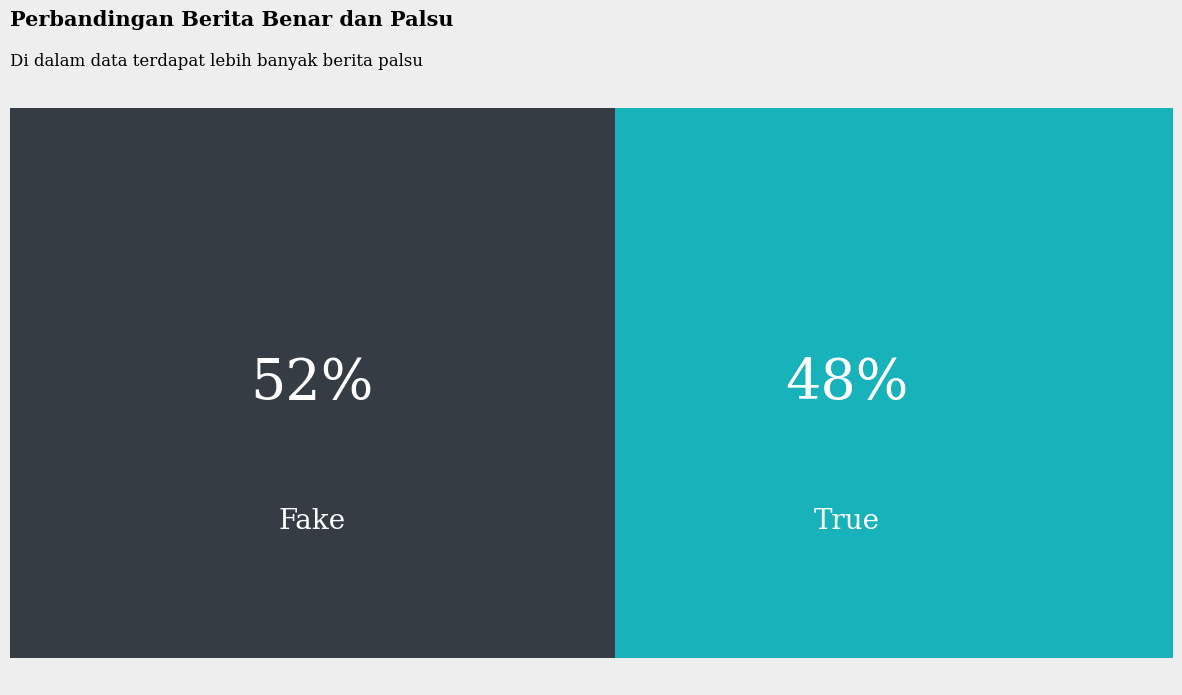

In [37]:
x = df.groupby('label')['label'].count()
y = len(df)


r=((x/y)).round(2)
status_ratio = pd.DataFrame(r).T
status_ratio.columns = ["Fake", "True"]

fig, ax = plt.subplots(1,1,figsize=(15, 8),dpi = 100)

fig.patch.set_facecolor('#EEEEEE')

ax.set_facecolor('#EEEEEE')

ax.barh(status_ratio.index, status_ratio['Fake'], 
        color='#222831', alpha=0.9, label='Fake')
ax.barh(status_ratio.index, status_ratio['True'], left=status_ratio['Fake'], 
        color='#00ADB5', alpha=0.9, label='True')


for i in status_ratio.index:
    ax.annotate(f"{int(status_ratio['Fake'][i]*100)}%", 
                   xy=(status_ratio['Fake'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Fake", 
                   xy=(status_ratio['Fake'][i]/2, -0.20),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',color='white')

for i in status_ratio.index:
    ax.annotate(f"{int(status_ratio['True'][i]*100)}%", 
                   xy=(status_ratio['True'][i]+status_ratio['True'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("True", 
                   xy=(status_ratio['True'][i]+status_ratio['True'][i]/2, -0.20),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Title & Subtitle
fig.text(0.125,0.95,'Perbandingan Berita Benar dan Palsu', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.90,'Di dalam data terdapat lebih banyak berita palsu',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)